<center>Universidade Federal de Viçosa</center>
<center>Coordenadoria de Educação Aberta e a Distância</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT578 - Análise de Imagens e Visão Computacional</center>
<center>TURMA 2022/2</center>

**<center>AULA PRÁTICA 3: Técnicas de Filtragem, Transformações Geométricas e Métricas de Qualidade de Imagem </center>**


In [ ]:
#Permissão para acessar o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Importando bibliotecas
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Definindo uma imagem na escala de cinza
I=np.array([[1,1,5,0,3],[4,3,0,1,4],[0,1,4,1,5],[0,1,3,0,4],[0,5,0,1,1]],
           dtype='uint8')
F = np.array([[1,1,1],[2,1,3],[1,0,2]],dtype='uint8')

print (I), print()
print (F), print()

#Filtragem - Operação com a vizinhança: Correlação cruzada

#src:imagem de entrada
#-1: deepth=profundidade do pixel, se negativo terá a mesma profundidade que a imagem de entrada
#F: kernel=sua máscara de correlação (filtro)
#anchor= indica a posição do elemento da máscara que vai ancorar no 
#pixel da imagem que está sendo processada (-1,-1 é default: indica ancoragem no centro da máscara)
#delta= valor que será somado ao pixel processado
#borderType= como preenche a imagem quando a máscara estiver nas extremidades - é um flag
I_F1 = cv2.filter2D(I,-1,F)
I_F2 = cv2.filter2D(I,-1,F,borderType=cv2.BORDER_REFLECT_101) #esse é o default, o anterior é o mesmo resultado
I_F3 = cv2.filter2D(I,-1,F,borderType=0) #BORDER_CONSTANT

print (I_F1)
print (I_F2)
print (I_F3)

[[1 1 5 0 3]
 [4 3 0 1 4]
 [0 1 4 1 5]
 [0 1 3 0 4]
 [0 5 0 1 1]]

[[1 1 1]
 [2 1 3]
 [1 0 2]]

[[25 29 16 32 12]
 [25 26 18 35 15]
 [18 26 14 40 16]
 [22 15 18 30 14]
 [30 15 18 22 10]]
[[25 29 16 32 12]
 [25 26 18 35 15]
 [18 26 14 40 16]
 [22 15 18 30 14]
 [30 15 18 22 10]]
[[10 22 12 27  4]
 [17 26 18 35 10]
 [12 26 14 40 12]
 [14 15 18 30 11]
 [16  9 17 11  7]]


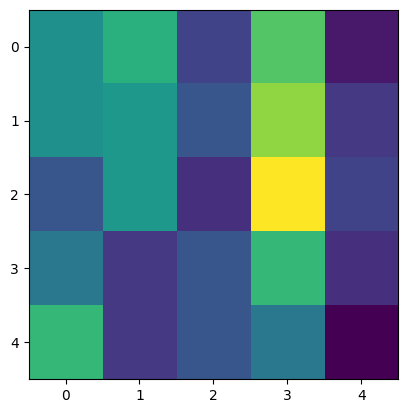

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(I_F1)

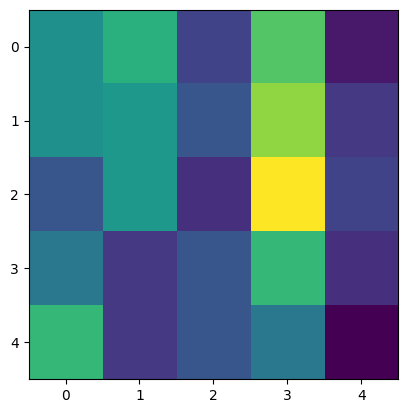

In [ ]:
plt.imshow(I_F2)

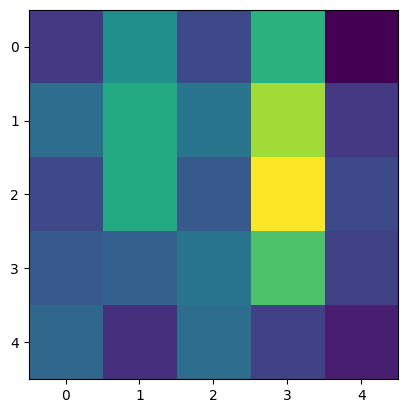

In [ ]:
plt.imshow(I_F3)

In [ ]:
chopp=cv2.imread('/content/drive/MyDrive/visao_computacional/p2/IMG_4975.jpeg',0)
paisagem=cv2.imread('/content/drive/MyDrive/visao_computacional/DSC_1858.jpg',0)

cv2_imshow(chopp)
cv2_imshow(paisagem)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Funcao para acrescentar ruído Salt & Pepper em uma imagem de uma banda
def add_chuvisco(original, controle):
    # controle número entre 0 e 0,5 que controla a quantidade de ruído
    # quanto mais perto de 0,5, maior a quantidade de ruído
    
    # cria uma matriz com RUIDOS ALEATÓRIOS entre 0 e 1, com a mesma dimensão da imagem original
    ruido = np.random.rand(original.shape[0],original.shape[1])
    
    # cópia da imagem original, onde será acrescentado o ruído
    ruidosa = original.copy()
    
    #acrescentando ruído
    ruidosa[ruido<controle]=0
    ruidosa[ruido>1-controle]=255
    
    return ruidosa

chopp_chuvisco = add_chuvisco(chopp,0.05)

cv2_imshow(chopp_chuvisco)


#Função para acrescentar RUIDO GAUSSIANO em uma imagem de uma banda 
def add_gauss(original,media,dp):
    # ruídos aleatórios com média (media) e desvio padrao (dp)
    # cria uma matriz com ruidos aleatórios entre 0 e 1, com a mesma dimensão da imagem original
    
    ruido= np.zeros(original.shape, np.uint8) # não use a imagem original - sobreescreve 
    cv2.randn(ruido,media,dp) # distribuição normal randômica  
    
    #acrescentando ruído
    ruidosa = np.add(original,ruido)
    
    return ruidosa

paisagem_gauss = add_gauss(paisagem,0,30)

cv2_imshow(paisagem_gauss)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Suavização (Borramento, remoção de ruídos (domínio espacial))
#blur= borramento
chopp_S=cv2.blur(chopp,(7,7))
paisagem_S=cv2.blur(paisagem,(3,3))
chopp_CS=cv2.blur(chopp_chuvisco,(3,3))
paisagem_GS=cv2.blur(paisagem_gauss,(3,3))

titulos = ['chopp_S', 'paisagem_S', 'chopp_CS','paisagem_GS']
imagens = [chopp_S, paisagem_S, chopp_CS,paisagem_GS]

from matplotlib import pyplot as plt
for i in list(range(4)): # i varia de 0 a 3
    plt.subplot (2,2,i+1), plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
    plt.title(titulos[i])
    plt.xticks([]), plt.yticks([])
plt.show()

cv2_imshow(chopp_S)
cv2_imshow(paisagem_S)
cv2_imshow(chopp_CS)
cv2_imshow(paisagem_GS)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#SOBEL - MASCARA PASSA ALTA POR AGUÇAMENTO
#Aplica uma Suavização com Gauss, antes de aplicar o Sobel
#Realça as bordas e ruídos
#É um filtro por derivadas
chopp_sobel = cv2.Sobel(chopp,-1,1,0)

print(chopp_sobel.dtype)
print(chopp_sobel.min)
print(chopp_sobel.max)


#QUAL PROCESSAMENTO É ESSE? 
chopp_sobel = (chopp_sobel.astype(float)-chopp_sobel.min())/(chopp_sobel.max()-chopp_sobel.min())*255
chopp_sobel = np.uint8(chopp_sobel)


cv2_imshow(chopp_sobel)

Output hidden; open in https://colab.research.google.com to view.

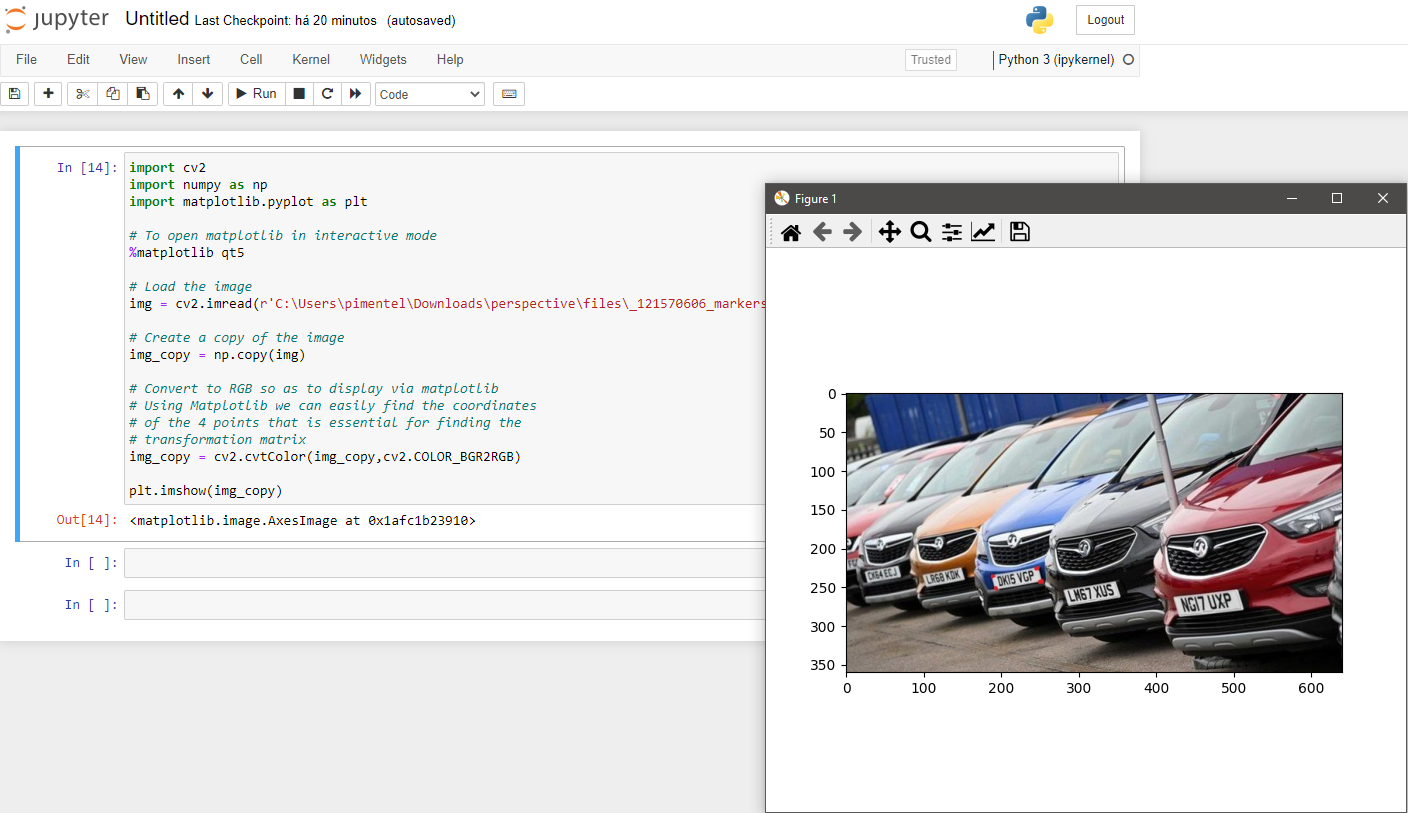

##**Transformações Geométricas - Perspectiva**

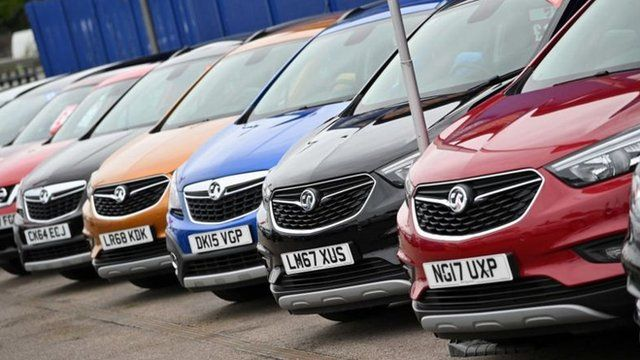

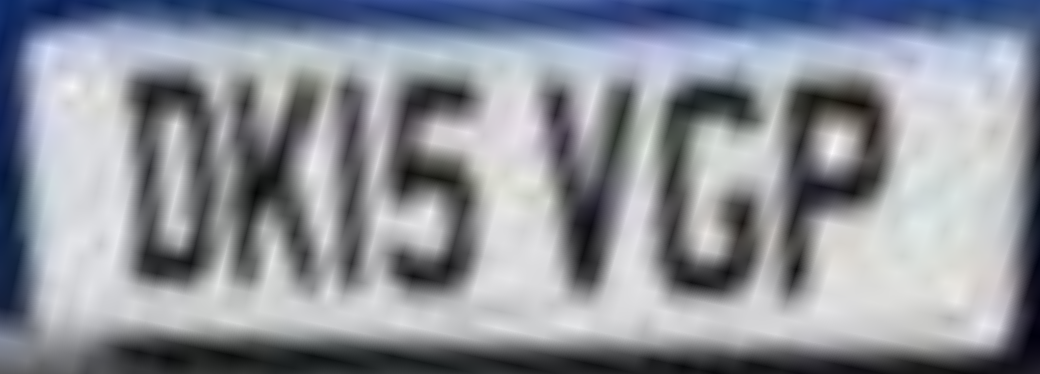

True

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Imagem lateral 1
pt1=np.float32([[188.7, 234.9],[246.7, 225.9],[250, 242], [193, 252]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

I1=cv2.imread('/content/drive/MyDrive/visao_computacional/p2/_121570606_carrosgetty.jpg')
M=cv2.getPerspectiveTransform(pt1,pt2)
IT1=cv2.warpPerspective(I1,M,(1040,374))

cv2_imshow(I1) #original
cv2_imshow(IT1) #placa
cv2.imwrite('PLACAL1.png',IT1) #placa1

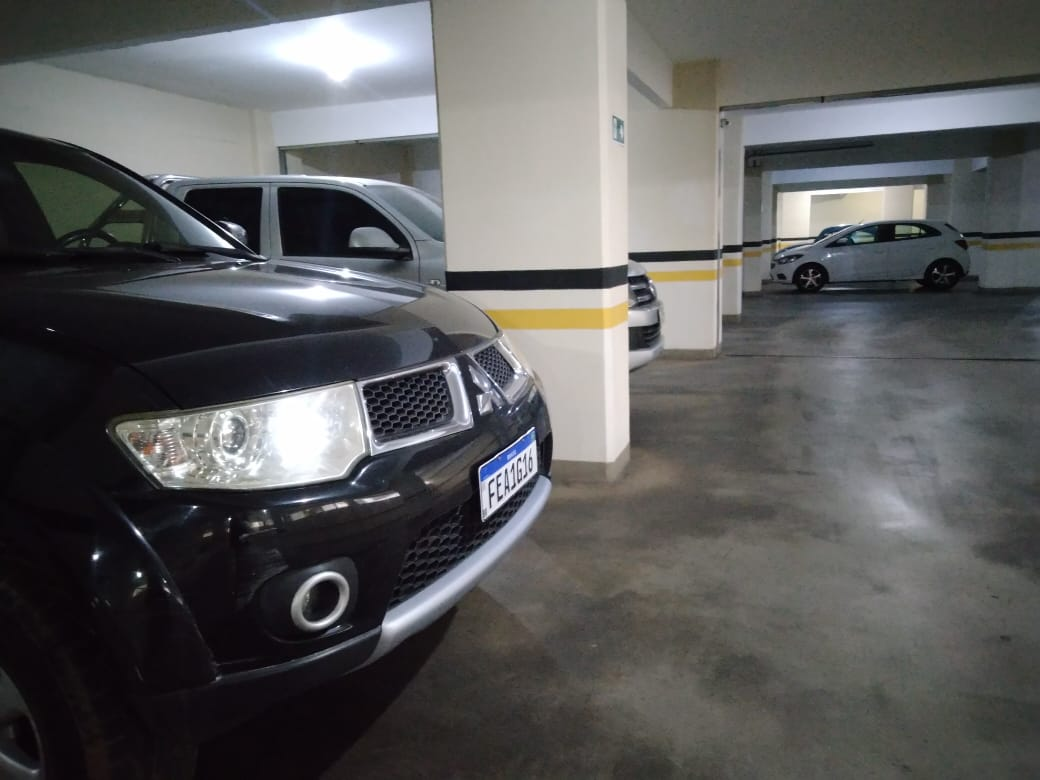

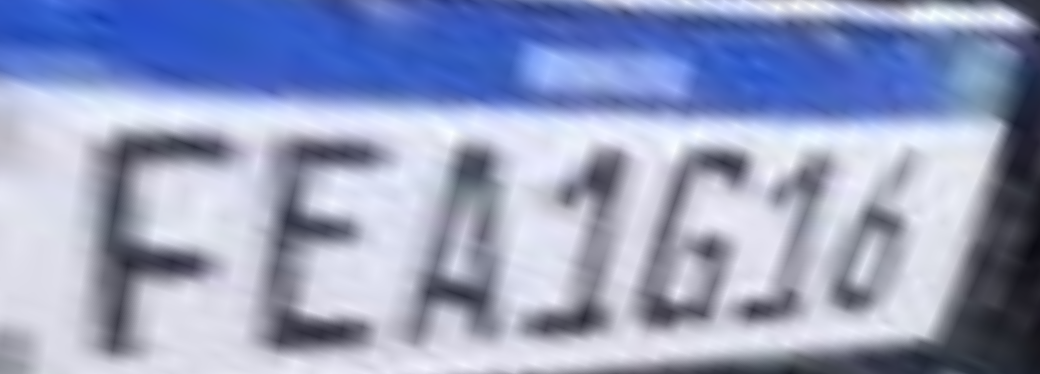

True

In [ ]:
#Imagem lateral 2
pt1=np.float32([[485, 473], [534, 432], [540, 469], [487, 505]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

I2=cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/placa_lateral2.jpg')
M=cv2.getPerspectiveTransform(pt1,pt2)
IT2=cv2.warpPerspective(I2,M,(1040,374))

cv2_imshow(I2)
cv2_imshow(IT2)
cv2.imwrite('PLACAL2.png',IT2)

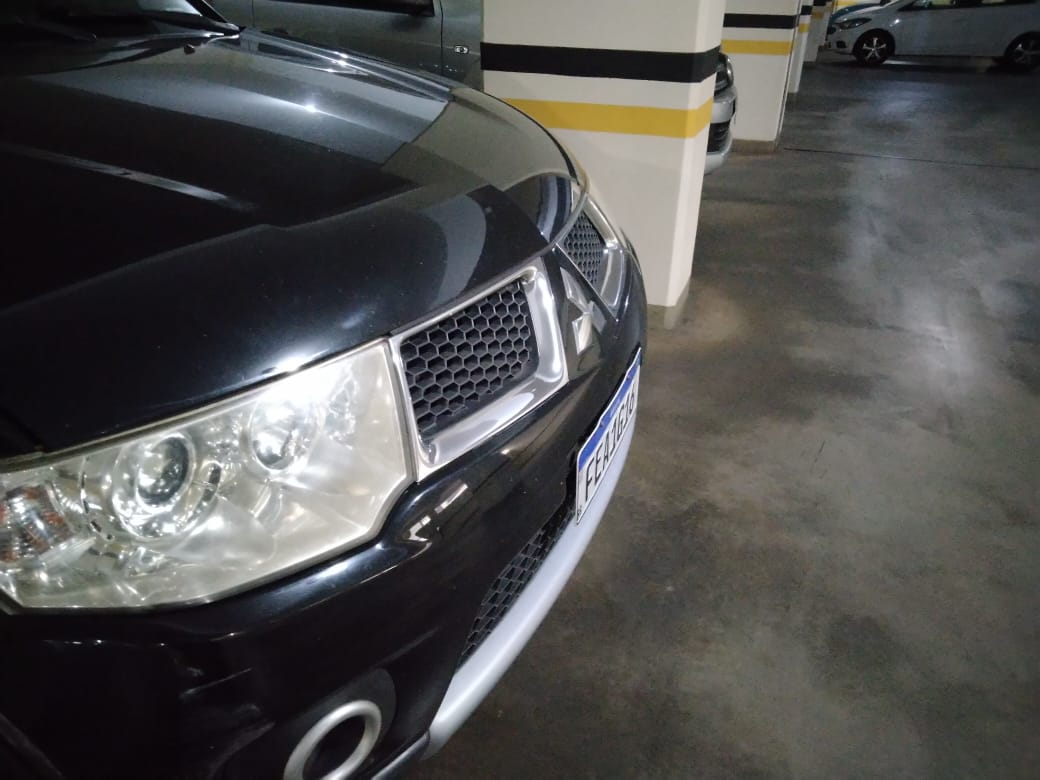

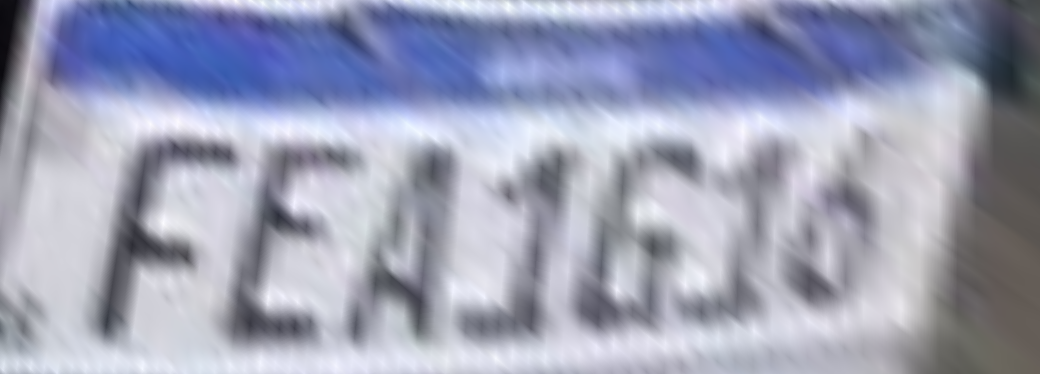

True

In [ ]:
#Imagem lateral 3
pt1=np.float32([[578, 463], [641, 359], [639, 402], [582, 505]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])


I3=cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/placa_lateral3.jpg')
M=cv2.getPerspectiveTransform(pt1,pt2)
IT3=cv2.warpPerspective(I3,M,(1040,374))

cv2_imshow(I3)
cv2_imshow(IT3)
cv2.imwrite('PLACAL3.png',IT3)

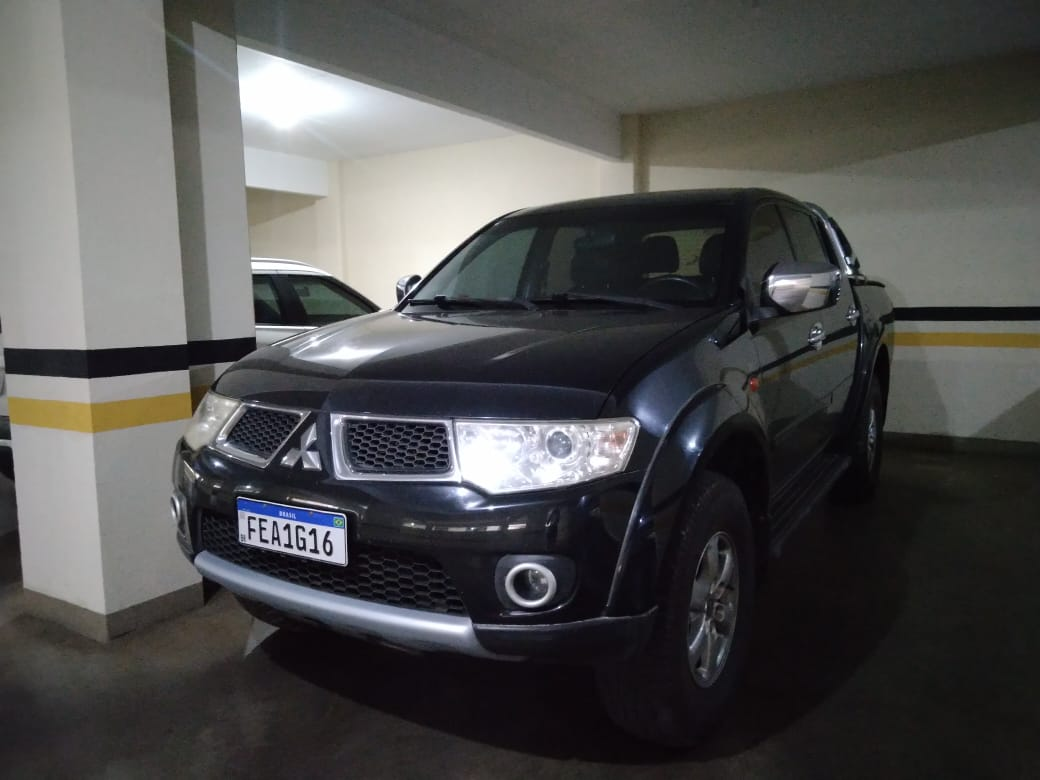

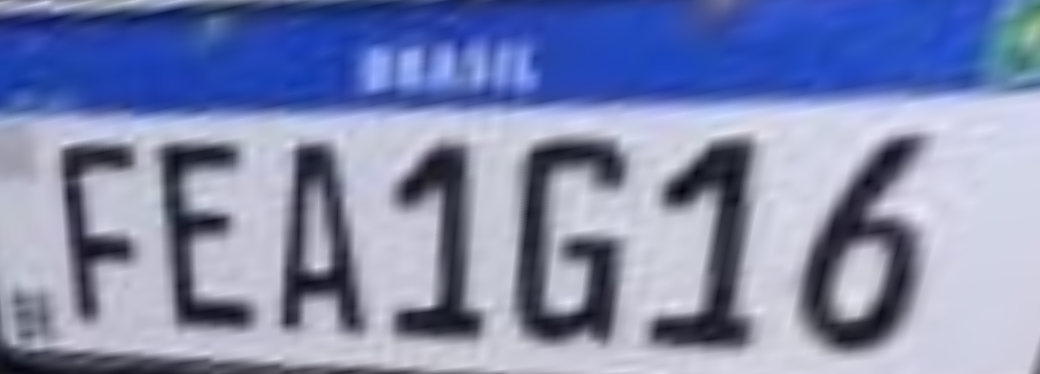

True

In [ ]:
#Imagem lateral 4
pt1=np.float32([[247, 501], [335, 524], [339, 556],[245, 538]])
pt2=np.float32([[48, 28],[1011, 60],[977, 341],[52, 317]])

I4=cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/placa_lateral4.jpg')
M=cv2.getPerspectiveTransform(pt1,pt2)
IT4=cv2.warpPerspective(I4,M,(1040,374))

cv2_imshow(I4)
cv2_imshow(IT4)
cv2.imwrite('PLACAL4.png',IT4)

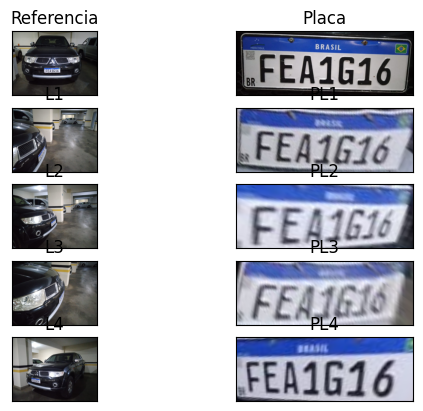

In [ ]:
#Visualizando todas as placas
from matplotlib import pyplot as plt

titulos = ['Referencia','Placa','L1','PL1','L2','PL2','L3','PL3','L4','PL4']
CR= cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/placa_ampliada.jpg')
IR=cv2.imread('/content/drive/MyDrive/ELT578_2022_2/SEMANA_2/placa_referencia.jpg')
imagens = [CR, IR, I1, IT1, I2, IT2, I3, IT3, I4, IT4]
for i in list(range(10)):
 plt.subplot (5,2,i+1), plt.imshow(cv2.cvtColor(imagens[i], cv2.COLOR_BGR2RGB))
 plt.title(titulos[i])
 plt.xticks([]), plt.yticks([])
plt.show()

##**Métricas de Qualidade de Imagem**

[[  0   0   0   0   0   0   0]
 [  0 255 255 255 255   0   0]
 [  0 255   0   0 255 255   0]
 [  0 255   0   0   0 255   0]
 [  0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


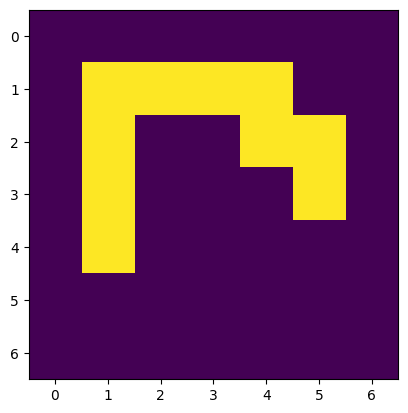

In [ ]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Definindo a imagem f
f= np.zeros((7,7),dtype='uint8')

#lembrar que começa em 0 e o intervalo é aberto
f[1,1:5]=255
f[1:5,1]=255
f[2,4:6]=255
f[3,5]=255

#Plotando a imagem definida em formato de matriz 
print(f)

#Utilizamos a biblioteca Matplotlip para plotar a imagem definida
plt.imshow(f)  

[[  0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0]
 [  0 255   0 255   0   0   0]
 [  0 255   0   0 255   0   0]
 [  0 255   0   0 255   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


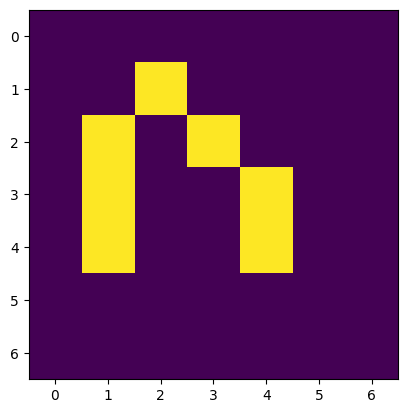

In [ ]:
# Definindo a imagem g
g= np.zeros((7,7),dtype='uint8')

g[1,2]=255
g[2:5,1]=255
g[2,3]=255
g[3:5,4]=255

print(g)
plt.imshow(g)

In [ ]:
#Erro quadrático médio
MSE= np.sum(np.square(f.astype(float)-g.astype(float)))/(f.shape[0]*f.shape[1])
print(MSE)

#Erro máximo
ME=np.max(f.astype(float)-g.astype(float))
print(ME)

#Erro médio absoluto
MAE= np.sum(f.astype(float)-g.astype(float))/(f.shape[0]*f.shape[1])
print(MAE)

#Raiz do Erro Médio Quadrático
RMSE = np.sqrt(MSE)
print(RMSE)

#Erro Médio Quadrático Normalizado
NMSE = MSE/np.sum(np.square(f.astype(float)))
print(NMSE)

# Coeficiente de correlação 
#A correlação pode ser calculada através de uma função pronta da biblioteca numpy
print(np.corrcoef(f.flatten(),g.flatten())[0,1]) # As matrizes são achatadas (flatten) para o correto funcionamento desta função

11943.367346938776
255.0
15.612244897959183
109.28571428571429
0.018367346938775512
0.37210420376762593
